In [13]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [14]:
weather = pd.read_csv("weather.csv")
weather.tail(10)

,humidity,pressure,clearness
40,62,1020,1
41,74,1009,2
42,47,1016,2
43,80,1020,1
44,82,1013,2
45,46,1007,2
46,89,1013,2
47,88,1022,2
48,79,1020,1
49,70,1015,1


<Axes: xlabel='humidity', ylabel='pressure'>

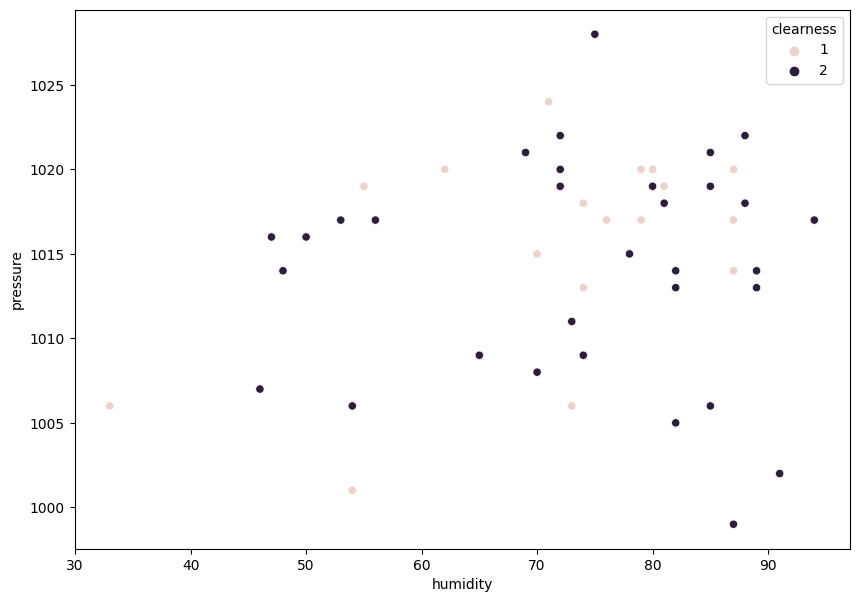

In [17]:
sns.scatterplot(x="humidity", y="pressure", hue="clearness", data=weather)

In [18]:
# test-train split
X = weather[["humidity","pressure"]].to_numpy()
y = weather[["clearness"]].to_numpy() - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [19]:
## Initiate classifier and train it using the X_train data and the y_train labels
## make sure you instantiate your classifier and name it model
model = Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 2)                 4         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [20]:
## train your model
model.fit(X_train, y_train, epochs=100, batch_size=30)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 100.3341 - accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 99.6855 - accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 99.0297 - accuracy: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 98.3399 - accuracy: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 97.7019 - accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 97.0882 - accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 96.4050 - accuracy: 0.4000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 95.7509 - accuracy: 0.4000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 95.1347 - accuracy: 0.4000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 94.4923 - accuracy: 0.4000
Epoch 11/100
2/2 [

In [21]:
## test the accuracy of your model
loss,acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 62.2163 - accuracy: 0.2000


313/313 [==============================] - 0s 1ms/step


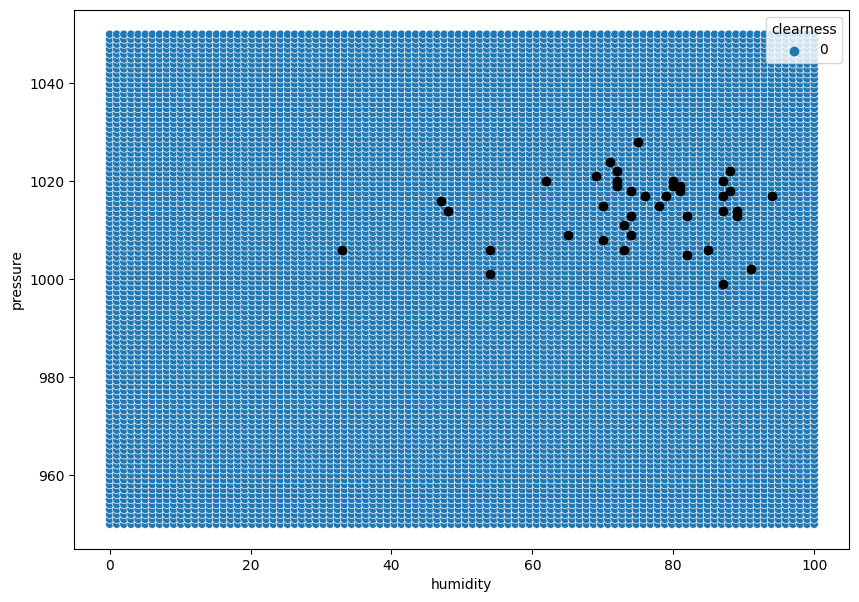

In [22]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
## Plot the decision boundary
humidity = np.linspace(0,100,100)
pressure = np.linspace(950,1050,100)
from itertools import product
randomdata = np.array(list(product(humidity, pressure)))
g = model.predict(randomdata)
db=pd.DataFrame({"humidity":randomdata[:,0],"pressure":randomdata[:,1],"clearness":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="humidity",y="pressure",hue="clearness")
plt.scatter(X_train[:,0],X_train[:,1],color="black")

In [23]:
# dump your classifier into a pickle file
pickle.dump(model,open("model.pickle",'wb'))

In [24]:
# test pickled file
file = open('model.pickle','rb')
model2 = pickle.load(file)
file.close()

print(model2)
## test the accuracy of your loaded model and compare